In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [76]:
tweets = pd.read_csv('train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [77]:
tweets.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


# Ubicacion de un tweet

La idea es analizar para ver si podemos encontrar alguna relacion entre la veracidad de los tweets y la ubicacion de los mismos. Primero revisamos como es el estilo de los datos y cuales son los mas frecuentes.

In [78]:
tweets.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


Armo un plot con el top 50 mas frecuentes ubicaciones para visualizar mejor la distribucion de ellas.

Text(0.5, 1.0, 'Frecuencias de cada ubicacion')

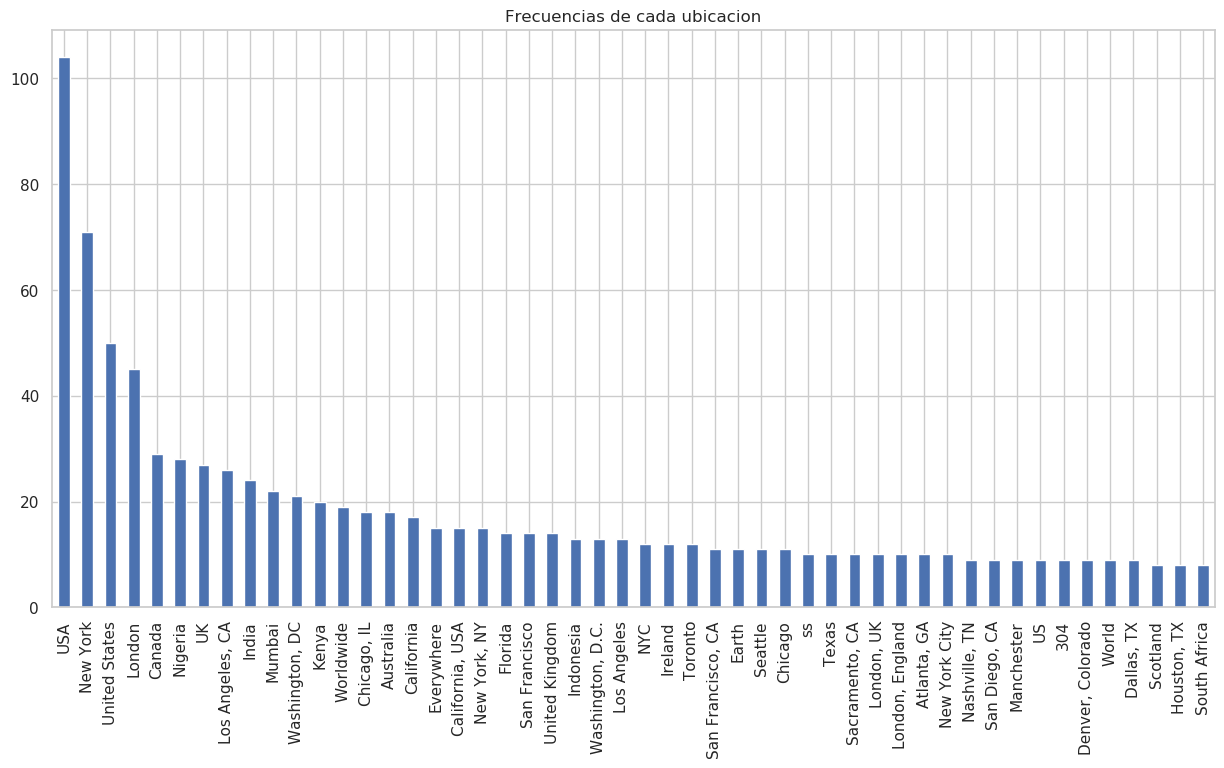

In [79]:
location_counts = tweets['location'].value_counts(dropna=True)
chart = location_counts.head(50).plot.bar(x='Ubicacion', y='Frecuencia', figsize=(15,7.5))
chart.set_title('Frecuencias de cada ubicacion')

¿Estara relacionada la veracidad de los tweets y la frecuencia de la ubicacion? Vamos a analizarlo agregando 2 columnas nuevas al dataframe. Estas nos van a mostrar la cantidad de tweets verdaderos y de tweets falsos que contiene cada lugar de ubicacion. 

In [80]:
location_df = pd.DataFrame([location_counts]).transpose()
location_df.columns = ['frequency']
location_df.loc[:, 'real_tweet_count'] = location_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].sum())
location_df.loc[:, 'fake_tweet_count'] = location_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].apply(lambda y: y).sum())

Tomamos estas columnas nuevas y graficamos los datos para las 50 primeras.

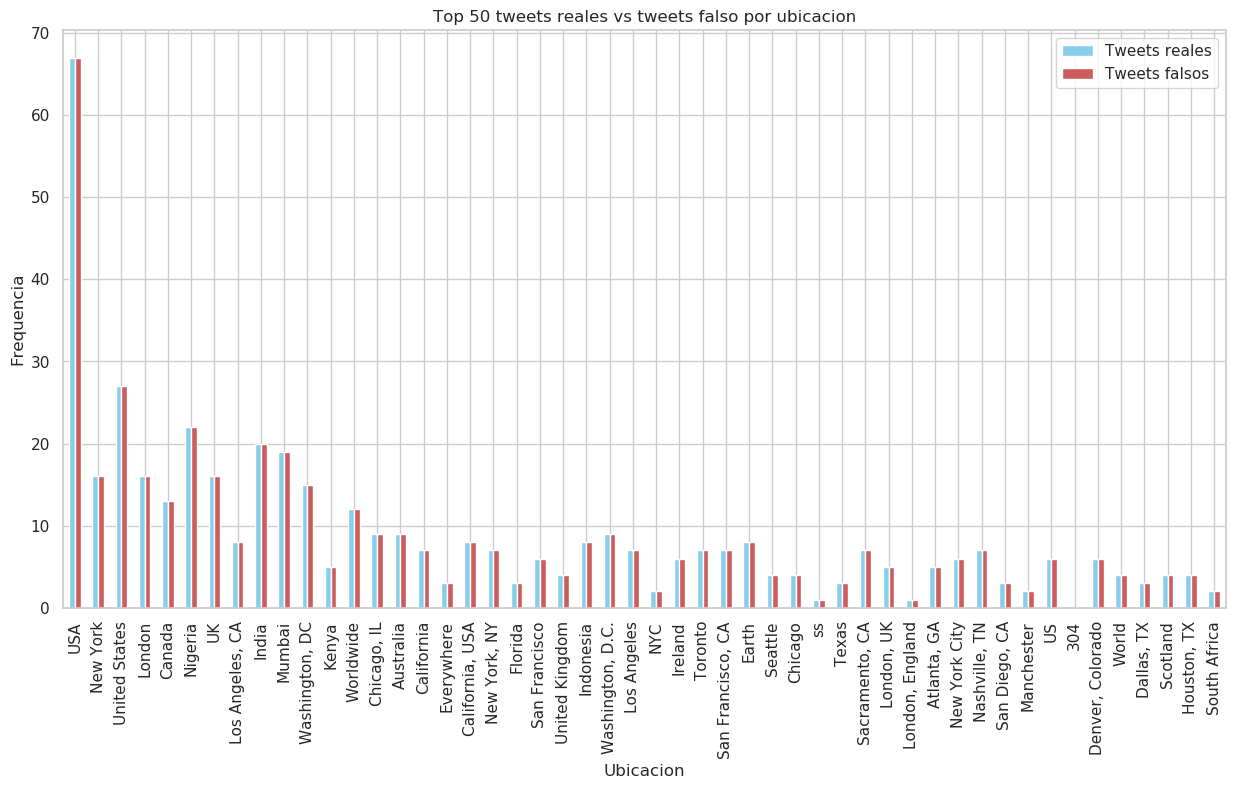

In [81]:
plot_df = pd.DataFrame({"Tweets reales": location_df['real_tweet_count'].head(50), "Tweets falsos": location_df['fake_tweet_count'].head(50)})
ax = plot_df.plot.bar(color=["SkyBlue","IndianRed"], figsize=(15,7.5), title="Top 50 tweets reales vs tweets falso por ubicacion")
ax.set_xlabel("Ubicacion")
ax.set_ylabel("Frequencia")
plt.show()

Como puede verse a primera vista no creo que podamos marcar ningun tipo de relacion entre las ubicaciones mas comunes y la veracidad de los tweets. Aun asi pareceria que las ubicacones con paises tienen un mayor porcentaje de tweets verdaderos. Separo las ubicaciones por paises.

In [82]:
countries = {
    'USA',
    'United States',
    'UK',
    'Canada',
    'Indonesia',
    'Kenya',
    'Nigeria',
    'US',
    'Scotland',
    'Ireland',
    'Australia',
    'United Kingdom',
    'South Africa'
}
countries_available = [x for x in location_counts.index.tolist() if x in countries]
country_df = pd.DataFrame()
for c in countries_available:
    country_df[c] = pd.Series(dtype=object)
country_df = country_df.transpose()
country_df.loc[:, 'Tweets reales'] = country_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].sum())
country_df.loc[:, 'Tweets falsos'] = country_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].apply(lambda y: 1 - y).sum())

Tomamos estos datos por pais y graficamos

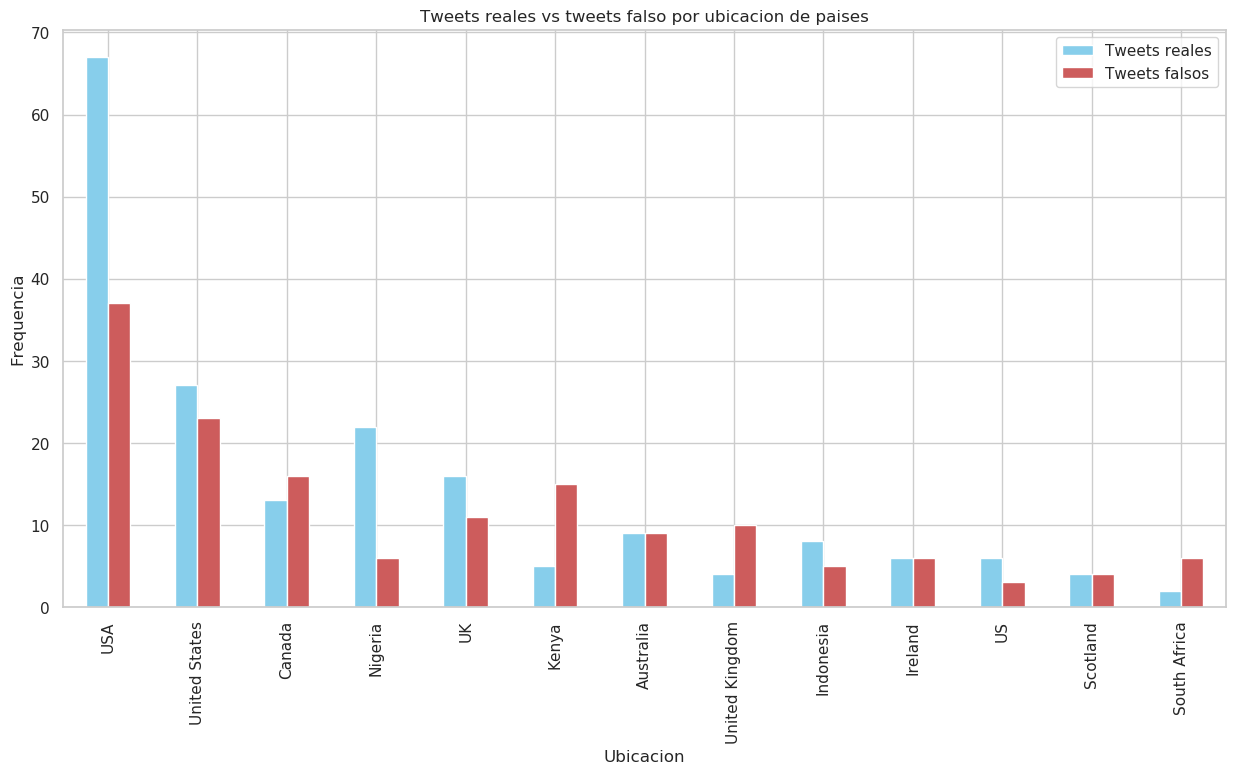

In [83]:
ax = country_df.plot.bar(color=["SkyBlue","IndianRed"], figsize=(15,7.5), title="Tweets reales vs tweets falso por ubicacion de paises")
ax.set_xlabel("Ubicacion")
ax.set_ylabel("Frequencia")
plt.show()

En conclusion si bien pareceria que hay un mayor % de veracidad cuando la ubicacion se trata de un pais, no hay ninguna trend muy notable a la que podamos señalar.

### Ubicaciones invalidas

Ahora si, ¿Que ocurre con las ubicaciones que no representan ninguna ciudad? Voy a filtrar por ubicaciones que contengan caracteres invalidos como \#, ?, numeros y analizo la veracidad de esos tweets. 

In [84]:
invalid_characters_regex = '#|\$|\|%|\?|!|/|;|@|\+|\*|\d'
tweets_with_invalid_locs = tweets[tweets.location.notna() & tweets.location.str.match(invalid_characters_regex)]
tweets_with_invalid_locs

,id,keyword,location,text,target
103,149,aftershock,304,'The man who can drive himself further once th...,0
105,153,aftershock,304,'There is no victory at bargain basement price...,0
107,157,aftershock,304,'Nobody remembers who came in second.' Charles...,0
109,159,aftershock,304,'The harder the conflict the more glorious the...,0
125,180,aftershock,304,Sometimes you face difficulties not because yo...,0
...,...,...,...,...,...
7460,10676,wounds,?Gangsta OC / MV RP; 18+.?,@IcyMagistrate ÛÓher upper armÛÒ those /frig...,1
7471,10688,wreck,1/10 Taron squad,Season 3 of New Girl was such a emotional trai...,0
7499,10727,wreck,709?,I still need to finish the lover but I'm watch...,0
7561,10810,wrecked,6,@Tunes_WGG lol. U got wrecked,0


In [85]:
fake_and_real_tweets_with_invalid = tweets_with_invalid_locs.groupby('target').agg({'target': lambda x: x.size})

Casi el 70% de los tweets que tienen uno de estos caracteres en la ubicacion es falso. Los porcentajes los podemos visualizar mejor con un pie chart.

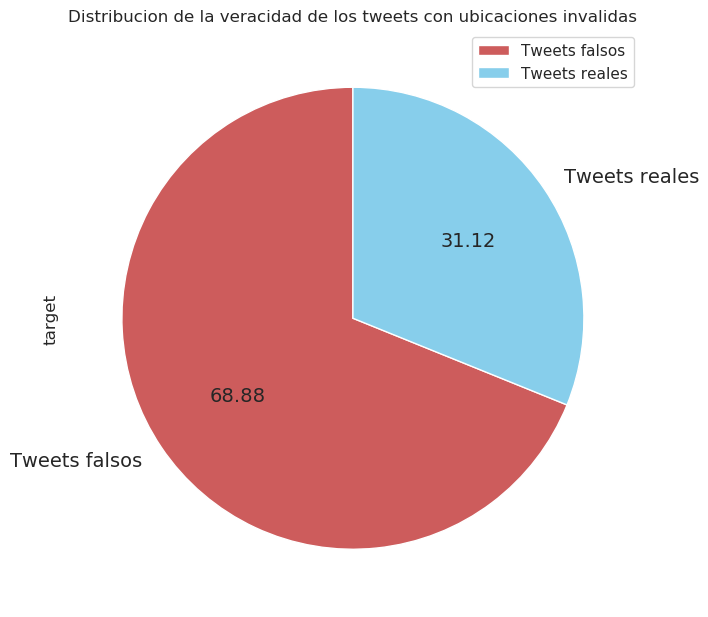

In [86]:
ax = fake_and_real_tweets_with_invalid.plot.pie(fontsize=14,colors=['IndianRed', 'SkyBlue'], labels=['Tweets falsos','Tweets reales'], autopct='%.2f', startangle=90, figsize=(15,7.5), y='target', title="Distribucion de la veracidad de los tweets con ubicaciones invalidas")
plt.show()

### Longitud de la ubicacion y la veracidad

Quiero analizar si hay alguna relacion entre la cantidad de caracteres que tienen las ubicaciones y la veracidad de los tweets. Para esto creo una columna nueva que guarde el length de la ubicacion. Las ubicaciones NaN las tomamos como 0.

In [87]:
tweets_location_length = tweets.copy()
tweets_location_length['location_length'] = [(0 if isinstance(t, float) else len(t)) for t in tweets_location_length['location']]
tweets_location_length

,id,keyword,location,text,target,location_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,0
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,0


¿Como es la distribucion de las longitudes de la ubicacion?

In [88]:
location_plot = tweets_location_length.where(lambda x: x['location_length'] > 0).dropna()

Remuevo las columnas que no tienen ubicacion y grafico

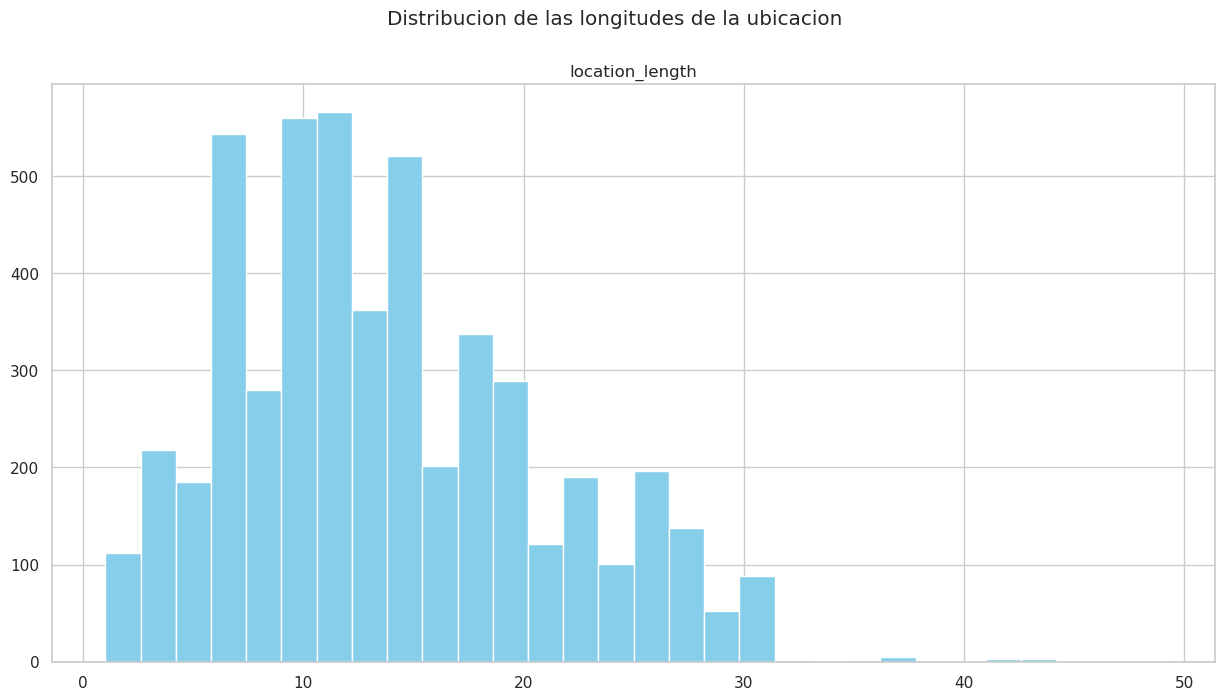

In [89]:
axes = location_plot.hist(column='location_length', figsize=(15,7.5), bins = 30, color = "skyblue")
plt.suptitle('Distribucion de las longitudes de la ubicacion')
plt.show()

Podemos ver que la longitudes rondan por su mayoria en el interval [5, 20]

Ahora analizamos las longitudes dividiendolas por categoria, reales o no (target 1 o 0)

In [90]:
location_plot.groupby('target').agg({'location_length': ['max', 'min', 'mean']})

location_length                
                   max  min       mean
target                                
0.0               47.0  1.0  13.636616
1.0               49.0  1.0  13.657559

A simple vista pareceria que la longitud de las ubicaciones de los tweets reales y los falsos tienden a ser muy similares y que no se puede asumir ninguna relacion entre ellos.

Armo un grafico para visualizar la relacion de las longitudes.

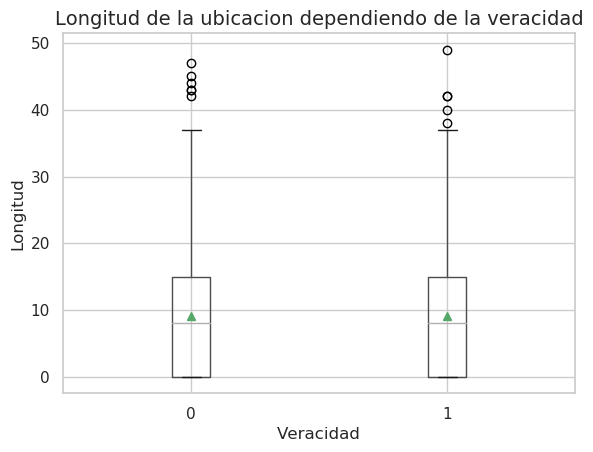

In [91]:
bp = tweets_location_length.boxplot(column='location_length', by='target', showmeans=True)
plt.suptitle("")
bp.set_title('Longitud de la ubicacion dependiendo de la veracidad', fontsize=14)
bp.set_ylabel('Longitud')
bp.set_xlabel('Veracidad')
plt.show()

### Nulalidad de la ubicacion

Viendo el estilo del los datos al inicio podemos observar que la mayoria de las ubicaciones no nulas se encuentran en america del norte o ciudades relacionadas. Pero ¿Cuantos de estas son nulas?. Añado una columna nueva al dataframe para guardar informacion sobre si la ubicacion es nula o no.

In [92]:
loc_tweets = tweets[['location', 'text', 'target']].copy()
loc_tweets.loc[:, 'has_location'] = loc_tweets['location'].notna()
loc_tweets.head()

,location,text,target,has_location
0,NaN,Our Deeds are the Reason of this #earthquake M...,1,False
1,NaN,Forest fire near La Ronge Sask. Canada,1,False
2,NaN,All residents asked to 'shelter in place' are ...,1,False
3,NaN,"13,000 people receive #wildfires evacuation or...",1,False
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1,False


Y ahora dividimos el analisis en 2 partes

#### Tweets sin ubicacion

Ahora si, ¿Cuantos tweets sin ubicacion tenemos?

In [93]:
tweets_without_loc = loc_tweets[loc_tweets['has_location'] == False].copy()
len(tweets_without_loc)

2533

¿Como es la distribucion de los tweets sin ubicacion? Armo una tabla y Grafico

In [94]:
def real_tweets(x):
    return sum([1 for y in x if y == 1])

def fake_tweets(x):
    return sum([1 for y in x if y == 0])

tweets_without_loc[['target', 'location']].groupby('target').agg(lambda x: x.size)

,location
target,
0,1458
1,1075


De los tweets sin ubicacion pareceria que la mayoria se compone de tweets falsos

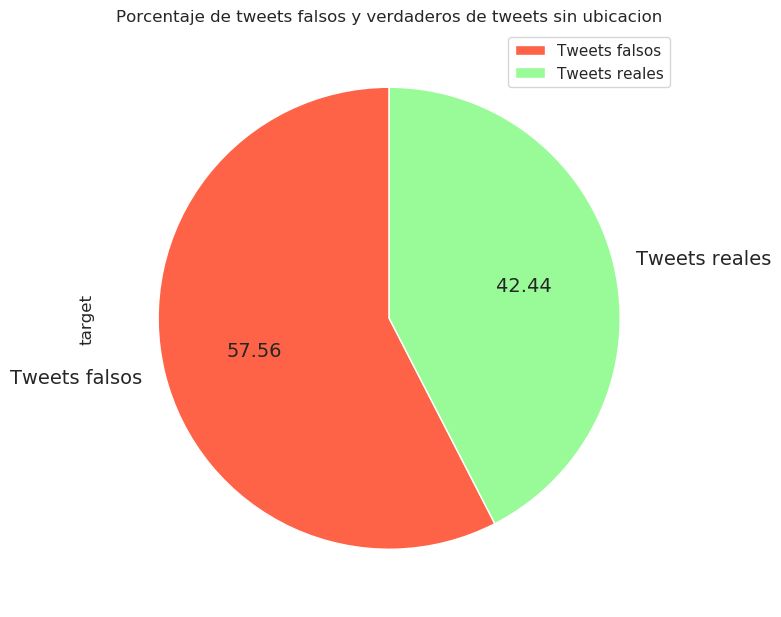

In [95]:
loc_plot = tweets_without_loc.groupby('target').agg({'target':lambda x: x.size})
ax = loc_plot.plot.pie(fontsize=14,colors=['tomato', 'palegreen'], labels=['Tweets falsos','Tweets reales'], autopct='%.2f', startangle=90, figsize=(15,7.5), y='target', title="Porcentaje de tweets falsos y verdaderos de tweets sin ubicacion")
plt.show()

#### Tweets con ubicacion

¿Cuantos tweets con ubicacion tenemos?

In [96]:
tweets_with_loc = loc_tweets[loc_tweets['has_location'] == True].copy()
len(tweets_with_loc)

5080

¿Tendremos algun tipo de relacion entre la ubicacion y el texto? Creo una nueva columna `location_in_text` que represente si la ubicacion esta mencionada en el texto.

In [97]:
in_text = tweets_with_loc.apply(lambda x: x['location'] in x['text'], axis=1)
tweets_with_loc.loc[:, 'location_in_text'] = in_text
tweets_with_loc.head()

,location,text,target,has_location,location_in_text
31,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,True,False
32,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,True,False
33,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,True,True
34,"Philadelphia, PA",Crying out for more! Set me ablaze,0,True,False
35,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,True,False


In [98]:
def real_tweets(x):
    return sum([1 for y in x if y == 1])

def fake_tweets(x):
    return sum([1 for y in x if y == 0])

tweets_with_loc[['target', 'location_in_text']].groupby('location_in_text').agg({'target': [fake_tweets, real_tweets]})

target            
                 fake_tweets real_tweets
location_in_text                        
False                   2864        2156
True                      20          40

A partir de esta informacion no podemos concluir mucho ya que muy pocos tweets mencionan la ubicacion en el tweet. Aun asi podemos ver que de los que mencionan la ubicacion en el tweet el 66% son reales.

<h2><center> Análisis del texto y su veracidad </center></h2>

In [99]:
disaster_tweets = pd.read_csv('train.csv')


In [100]:
disaster_tweets

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


-------------------------------
<h1> Información básica</h1>
<p> Acá podemos ver que todos los tweets tienen un target (veracidad) asociado, por lo tanto nos sirven todos los tweets.</p>
    <div>También podemos ver que tenemos 4342 tweets no verídicos, y 3271 que sí lo son.<div> 


In [101]:
disaster_tweets.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [102]:
disaster_tweets['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

---------------------------------------------------------
<h2>Le agregamos la longitud de cada tweet a su index asociado. </h2>

In [103]:
disaster_tweets['len'] = disaster_tweets['text'].transform(lambda x : len(x))
disaster_tweets[['id', 'text', 'target', 'len']]

,id,text,target,len
0,1,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,Forest fire near La Ronge Sask. Canada,1,38
2,5,All residents asked to 'shelter in place' are ...,1,133
3,6,"13,000 people receive #wildfires evacuation or...",1,65
4,7,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,Police investigating after an e-bike collided ...,1,137


Y de paso nos quedamos con los datos que nos interesan

In [104]:
target_len_tweets = disaster_tweets.loc[:,['target', 'len']]
target_len_tweets

,target,len
0,1,69
1,1,38
2,1,133
3,1,65
4,1,88
...,...,...
7608,1,83
7609,1,125
7610,1,65
7611,1,137


-------------------------------------------------------------
<h1> Datos de las longitudes </h1>
<p> Aca podemos ver que el promedio de la longitud de los tweets verídicos es un poco mayor a los falsos.

In [105]:
target_len_tweets.groupby('target').agg({'len' : 'mean'})

,len
target,
0,95.706817
1,108.113421


<p> Los proximos dos datos dan a conocer las longitudes máximas y mínimas de cada target. De ellas no se puede sacar una gran conclusión, pero nos dan ciertos parámetros. </p>

In [106]:
target_len_tweets.groupby('target').agg({'len' : 'max'})

,len
target,
0,157
1,151


In [107]:
target_len_tweets.groupby('target').agg({'len' : 'min'})

,len
target,
0,7
1,14


----------------------------------------------------

<p> Como la máxima longitud es 157, podemos dividir las longitudes en tres grandes grupos. <p>
<ol>
    <li> Longitud menor a 50 caracteres. </li>
    <li> Longitud entre 50 y 100 caracteres. </li>
    <li> Longitud mayor a 100 caracteres. </li>
<ol>

<b>Acá podemos ver que para el primer grupo hay bastantes más falsos que verdaderos, pero una baja cantidad de ambos:

In [108]:
low_lens = target_len_tweets.groupby('len').filter( lambda x: x['len'].mean() <50)
low_lens['target'].value_counts()

0    618
1    147
Name: target, dtype: int64

<b>Para el segundo siguen habiendo más falsos que verdaderos, pero se emparejo un poco. Ya la cantidad de tweets es un poco mayor:

In [109]:
medium_lens = target_len_tweets.groupby('len').filter( lambda x: x['len'].mean() > 50 and x['len'].mean() < 100)
medium_lens['target'].value_counts()

0    1486
1    1036
Name: target, dtype: int64

<b> Finalmente, en el tercer grupo, se observa que ya las cantidades de tweets son mayores (en este grupo se encuentra la mayoría de los tweets, 4219 de 7613). Y la cantidad de verdaderos es casi la misma que de falsos, pero apenas favoreciendo a los falsos. 

In [110]:
high_lens = target_len_tweets.groupby('len').filter( lambda x: x['len'].mean() > 100)
high_lens['target'].value_counts()

0    2180
1    2039
Name: target, dtype: int64

--------------------------------------------------
<h1> Visualizaciones</h1>
Ahora paso a ejemplificar estos datos antes provistos mediante un histograma. 
Voy a dividir los datos en dos sets, uno de datos verdaderos y otro de datos falsos, y analizaré las longitudes para ambos.

In [111]:
true_tweets = target_len_tweets.groupby('target').filter(lambda x: x['target'].mean() == 1)

In [112]:
false_tweets = target_len_tweets.groupby('target').filter(lambda x: x['target'].mean() == 0)


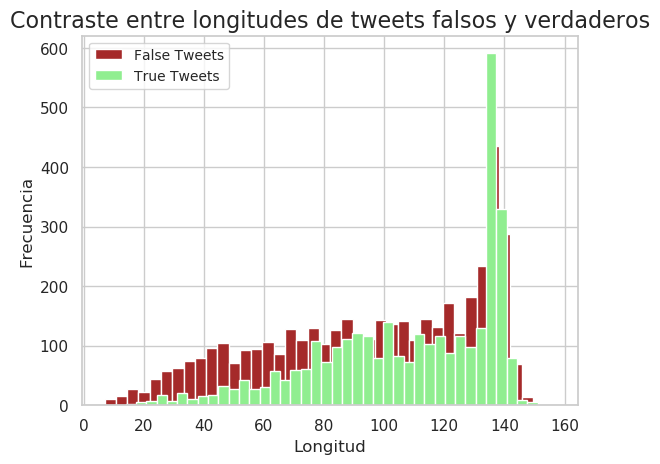

In [113]:
g = false_tweets['len'].plot.hist(bins=40, color='brown')
g = true_tweets['len'].plot.hist(bins=40, color='lightgreen')
g.set_title("Contraste entre longitudes de tweets falsos y verdaderos", fontsize=16)
g.set_xlabel("Longitud",fontsize=12)
g.set_ylabel("Frecuencia", fontsize=12)
g.legend(['False Tweets', 'True Tweets'], fontsize = 10)

A primera vista se observa como en general la mayoria de las longitudes menores estan predominadas por los tweets falsos, pero también nos damos cuenta como en realidad en el rango [135-145] de la longitd de caracteres, la cantidad de tweets verdaderos sobrepasa ligeralmente a los falsos, por lo tanto este sería el rango de longitud de caracteres "más verídica".

---------------------------------------------------------
Ahora paso a comprobar estos datos, y observo que efectivamente en ese rango hay más tweets verdaderos que falsos.

In [114]:
specific_len = disaster_tweets.loc[:,['target','len']].groupby('len').filter( lambda x: x['len'].mean() > 135 and x['len'].mean() < 145)
specific_len['target'].value_counts()

1    811
0    716
Name: target, dtype: int64

------------------------------------------------------
<h3>Ahora vamos a analizar un poco su contenido </h3>

In [115]:
disaster_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
 5   len       7613 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 357.0+ KB



Acá se puede ver que las columnas que vamos a analizar (texto y target) están completas y están en un tipo deseado (object para los textos e int para el target).



-----------------------------------------------------
Vamos a separarnos la porcion que nos interesa, el texto y su asociado target.

In [116]:
text_target = tweets[['text', 'target']]
text_target

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


<h3>Vamos a buscar contabilizar las palabras que aparecen, tanto verdaderas como falsas, para ver si encontramos algo interesante. </h3>
Primero hacemos un split de cada tweet en palabras.

In [117]:
text_target_cpy = text_target.copy()
text_target_cpy['text'] = text_target['text'].transform(lambda x: x.split())
text_target_cpy

,text,target
0,"[Our, Deeds, are, the, Reason, of, this, #eart...",1
1,"[Forest, fire, near, La, Ronge, Sask., Canada]",1
2,"[All, residents, asked, to, 'shelter, in, plac...",1
3,"[13,000, people, receive, #wildfires, evacuati...",1
4,"[Just, got, sent, this, photo, from, Ruby, #Al...",1
...,...,...
7608,"[Two, giant, cranes, holding, a, bridge, colla...",1
7609,"[@aria_ahrary, @TheTawniest, The, out, of, con...",1
7610,"[M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawa...",1
7611,"[Police, investigating, after, an, e-bike, col...",1


Primero separo entre tweets verdaderos y tweets falsos. 

In [118]:
true = text_target_cpy.groupby('target').filter(lambda x: x.mean() == 1)
false = text_target_cpy.groupby('target').filter(lambda x: x.mean() == 0)

Para cada conjunto de tweets voy a agregar todas las palabras a una lista, para posteriormente convertirlo en una serie y poder analizarla. 

In [119]:
false = false.reset_index().loc[:,['text']]
false_words = []
for x in false['text']:
    for word in x:
        false_words.append(word)
false_words = pd.Series(false_words)

In [120]:
true = true.reset_index().loc[:,['text']]
true_words = []
for x in true['text']:
    for word in x:
        true_words.append(word)
true_words = pd.Series(true_words)

-----------------------------------------------------
Voy a contabilizar las palabras de mayor longitud que 5 caracteres ya que con menos me van a aparecer todas proposiciones y palabras que no me interesan mucho. Además, de todas estas palabras, voy a seleccionar las 10 que más aparecen y las voy a representar en un grafico de barras.

Text(0, 0.5, 'Palabras')

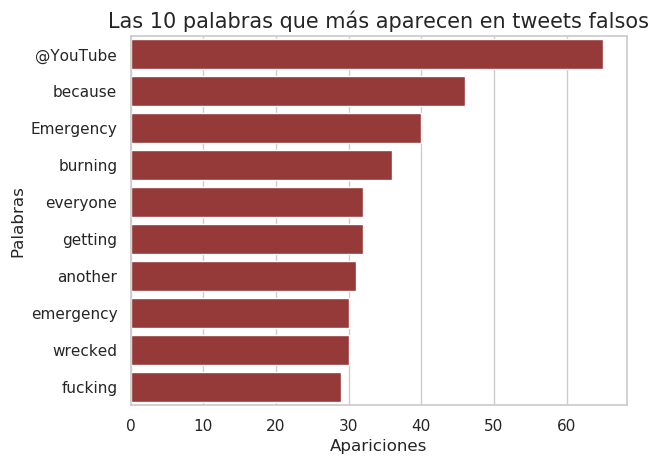

In [121]:
false_words_count = false_words[false_words.str.len() > 6].value_counts().iloc[:10]
g = sns.barplot(x=false_words_count.values, y=false_words_count.index, orient='h', color='brown')
g.set_title("Las 10 palabras que más aparecen en tweets falsos", fontsize=15)
g.set_xlabel("Apariciones", fontsize=12)
g.set_ylabel("Palabras", fontsize=12)

Podemos ver como hay algunas palabras que no nos interesan, pero aparece "@youtube" y "reddit" que nos indica que pueden estar hablando de un video de youtube o un posteo en reddit, es decir potenciales fuentes poco confiables. 

Text(0, 0.5, 'Palabras')

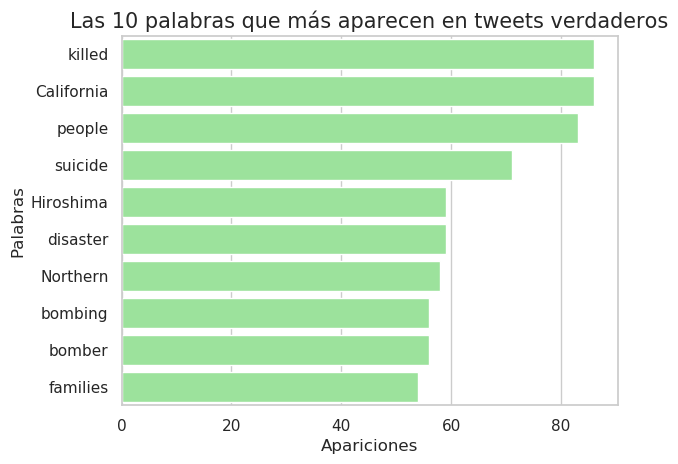

In [122]:
true_words_count = true_words[true_words.str.len() > 5].value_counts().iloc[:10]
g = sns.barplot(x=true_words_count.values, y=true_words_count.index, orient='h', color='lightgreen')
g.set_title("Las 10 palabras que más aparecen en tweets verdaderos", fontsize=15)
g.set_xlabel("Apariciones", fontsize=12)
g.set_ylabel("Palabras", fontsize=12)

<p>Ahora, analizando la sección verdadera, podemos ver como se mencionan palabras más relacionadas a desastes, tales como "killed", "suicide:, etc...</p>
También podemos ver que California es una de las palabras más utilizadas, esto se puede deber a que hubo muchos incidentes en este estado de EEUU.

-------------------------------------------------
<h3>Ahora vamos a pasar a analizar los hashtags de los tweets

Text(0, 0.5, 'Palabras')

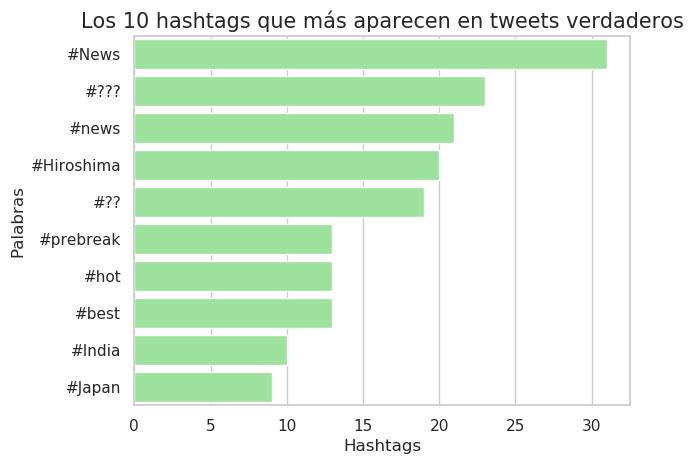

In [123]:
true_hashtags = true_words[true_words.str.contains('#')].value_counts().iloc[:10]
g = sns.barplot(x=true_hashtags.values, y=true_hashtags.index, orient='h', color='lightgreen')
g.set_title("Los 10 hashtags que más aparecen en tweets verdaderos", fontsize=15)
g.set_xlabel("Hashtags", fontsize=12)
g.set_ylabel("Palabras", fontsize=12)

En este gráfico se pueden observar varios tweets que nos podíamos esperar encontrar, tales como "News, ???, news", pero también aparecen algunos como Hiroshima, yyc (Aeropuerto de Calgary, Canada) o India, que nos puede hablar que sucedieron desastres en estos lugares. 
También hay un hashtag "hot" lo que nos deja pensando si será que se habrá quemado algún lugar... el calentamiento global... o simplemente hacía mucho calor.


Text(0, 0.5, 'Palabras')

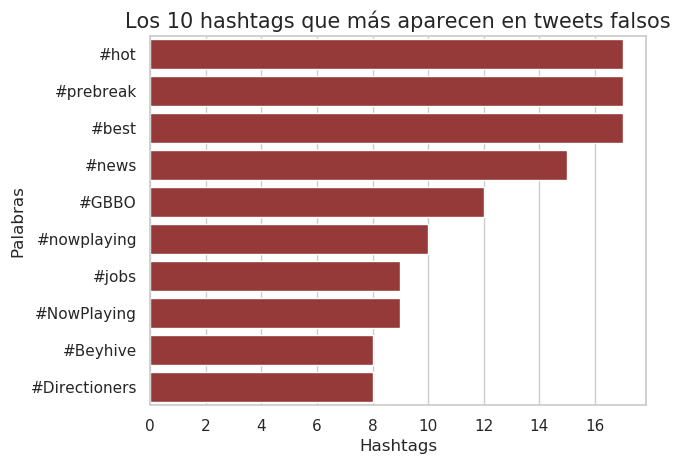

In [124]:
false_hashtags = false_words[false_words.str.contains('#')].value_counts().iloc[:10]
g = sns.barplot(x=false_hashtags.values, y=false_hashtags.index, orient='h',color='brown')
g.set_title("Los 10 hashtags que más aparecen en tweets falsos", fontsize=15)
g.set_xlabel("Hashtags", fontsize=12)
g.set_ylabel("Palabras", fontsize=12)

En cuanto a los hashtags falsos podemos ver que vuelven a aparecer algunos como "hot", "news" y "prebreak", pero tambien surgen algunas nuevas.

<h2>Análisis de veracidad respecto a los tipos de caracter del texto

Con el objetivo de seguir analizando la veracidad de los textos, intentamos profundizar aun más en ello. Para esto, vamos a analizar la cantidad de distintos tipos de caracter en proporcion de la longitud del texto y como se relaciona esto con la veracidad del mismo. <br>Para ello, reutilizaremos el dataframe antes creado y modificado, el cual ya contiene el tamaño del texto.

In [125]:
disaster_tweets

,id,keyword,location,text,target,len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


Para esclarecer la informacion, nos quedaremos con las tres columnas que consideramos esenciales para este analisis

In [126]:
text_target_len = disaster_tweets[['text','target','len']].copy()
text_target_len

,text,target,len
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,83
7609,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,Police investigating after an e-bike collided ...,1,137


Vamos a comprobar si alguna de las columnas contiene un elemento nulo.

In [127]:
text_target_len.count()

text      7613
target    7613
len       7613
dtype: int64

In [128]:
len(text_target_len.index)

7613

Como podemos ver, tenemos igual cantidad de elementos en las columnas que de indices, por ende no tenemos elementos nulos. Continuamos con el analisis.

<h3> Mayúsculas

Vamos a agregar una columan que indique la proporcion de mayusculas para cada texto en nuestro dataframe.

In [129]:
def count_uppercase(x):
    return sum(1 for c in str(x) if c.isupper())

text_target_len['uppercase_percentage'] = ((text_target_len['text'].map(lambda x: count_uppercase(x)) / \
                                           text_target_len['len']) * 100).round(2)
text_target_len

,text,target,len,uppercase_percentage
0,Our Deeds are the Reason of this #earthquake M...,1,69,14.49
1,Forest fire near La Ronge Sask. Canada,1,38,13.16
2,All residents asked to 'shelter in place' are ...,1,133,1.50
3,"13,000 people receive #wildfires evacuation or...",1,65,1.54
4,Just got sent this photo from Ruby #Alaska as ...,1,88,3.41
...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,83,8.43
7609,@aria_ahrary @TheTawniest The out of control w...,1,125,4.80
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,15.38
7611,Police investigating after an e-bike collided ...,1,137,2.92


Una vez que tenemos dicha informacion, podemos agrupar por veracidad y ver el promedio del porcentaje y cantidad de mayusculas. Para esto primero deberemos diferenciar entre los tweets que tengan mayusculas de los que no tienen ninguna. Por lo tanto, vamos a extraer un dataframe para los textos con porcentaje nulo y evaluar su promedio de veracidad

In [130]:
text_target_len_not_upper = text_target_len[text_target_len["uppercase_percentage"] == 0]
text_target_len_not_upper

,text,target,len,uppercase_percentage
20,this is ridiculous....,0,22,0.0
41,on the outside you're ablaze and alive\nbut yo...,0,61,0.0
79,the pastor was not in the scene of the acciden...,1,91,0.0
80,mom: 'we didn't get home as fast as we wished'...,0,142,0.0
98,@flowri were you marinading it or was it an ac...,0,53,0.0
...,...,...,...,...
7498,i still don't see the point of a frozen sequel...,0,85,0.0
7545,late night mcdonalds with friends = hilarious ...,0,129,0.0
7546,good luck to everyone who has school soon but ...,0,93,0.0
7562,you wrecked my whole world,0,26,0.0


Una vez obtenido este dataframe, vamos a evaluar su veracidad agrupando port target y contando cuantos son reales y cuantos falsos

In [131]:
text_target_len_not_upper_grouped = text_target_len_not_upper.groupby(['target']).agg({"target":["count"]})
text_target_len_not_upper_grouped.columns = text_target_len_not_upper_grouped.columns.get_level_values(0) \
                                            + "-" + text_target_len_not_upper_grouped.columns.get_level_values(1)
text_target_len_not_upper_grouped

,target-count
target,
0,221
1,57


In [132]:
(text_target_len_not_upper_grouped.loc[0] / len(text_target_len_not_upper) * 100).round(2)

target-count    79.5
Name: 0, dtype: float64

Podemos ver que el 79.5% de los tweets que no tienen ninguna mayúscula son falsos.

[Text(0, 0, 'Tweets falsos'), Text(0, 0, 'Tweets verdaderos')]

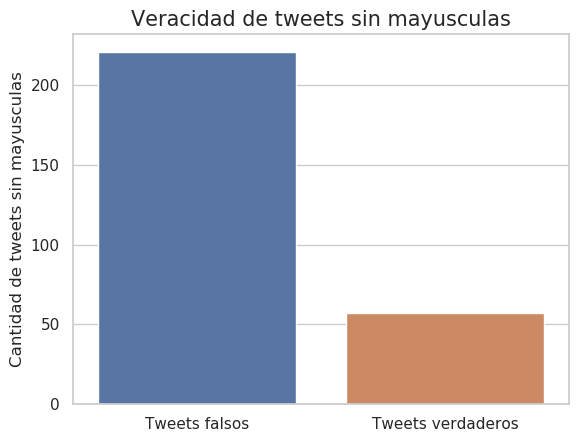

In [133]:
g = sns.barplot(y=text_target_len_not_upper_grouped['target-count'], \
                x=text_target_len_not_upper_grouped.index)
g.set_title("Veracidad de tweets sin mayusculas", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Cantidad de tweets sin mayusculas", fontsize=12)
g.set_xticklabels(labels=['Tweets falsos','Tweets verdaderos'])

Vamos a repetir este analisis pero para los textos que al menos tengan una mayuscula en su contenido.

In [134]:
text_target_len_upper = text_target_len[text_target_len["uppercase_percentage"] > 0]

text_target_len_upper_grouped = text_target_len_upper.groupby(['target']).agg({"target":["count"]})
text_target_len_upper_grouped.columns = text_target_len_upper_grouped.columns.get_level_values(0) \
                                            + "-" + text_target_len_upper_grouped.columns.get_level_values(1)
text_target_len_upper_grouped

,target-count
target,
0,4121
1,3214


In [135]:
(text_target_len_upper_grouped.loc[0] / len(text_target_len_upper) * 100).round(2)

target-count    56.18
Name: 0, dtype: float64

Vemos que en este caso el porcentaje de veracidad no es tan alto como en los textos sin mayúscula.

[Text(0, 0, 'Tweets falsos'), Text(0, 0, 'Tweets verdaderos')]

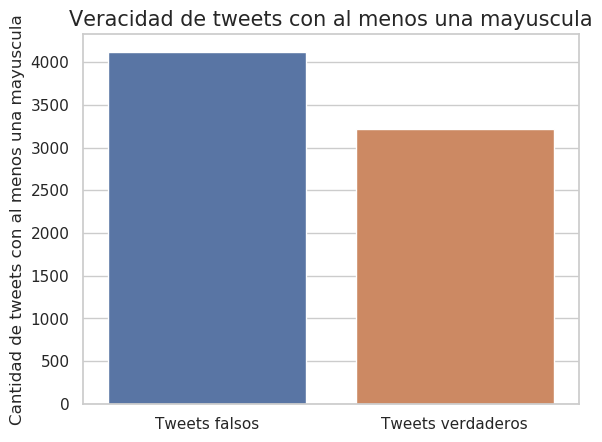

In [136]:
h = sns.barplot(y=text_target_len_upper_grouped['target-count'], \
                x=text_target_len_upper_grouped.index)
h.set_title("Veracidad de tweets con al menos una mayuscula", fontsize=15)
h.set_xlabel("", fontsize=12)
h.set_ylabel("Cantidad de tweets con al menos una mayuscula", fontsize=12)
h.set_xticklabels(labels=['Tweets falsos','Tweets verdaderos'])

Para continuar el analisis, tomaremos los porcentajes que sean mayores a 0, es decir, para todos los tweets que al menos tengan una mayúscula. Hacemos esta distinción porque vamos a analizar el promedio de las mayúsculas en los tweets y no tendría sentido incluir aquellos que no tengan al menos una mayúscula en su contenido.

In [137]:
text_target_len_grouped_mayus = text_target_len_upper.groupby(['target']).agg({"uppercase_percentage":["mean","count"]})
text_target_len_grouped_mayus.columns = text_target_len_grouped_mayus.columns.get_level_values(0) \
                                        + "-" + text_target_len_grouped_mayus.columns.get_level_values(1)
text_target_len_grouped_mayus


,uppercase_percentage-mean,uppercase_percentage-count
target,,
0,10.322274,4121
1,10.371549,3214


Podemos ver que el promedio es casi identico tanto para los tweets reales como falsos. Vamos a graficar como se distribuye el promedio tanto para los tweets reales como falsos y los graficaremos en un kdeplot solapado.

Text(0, 0.5, 'Densidad')

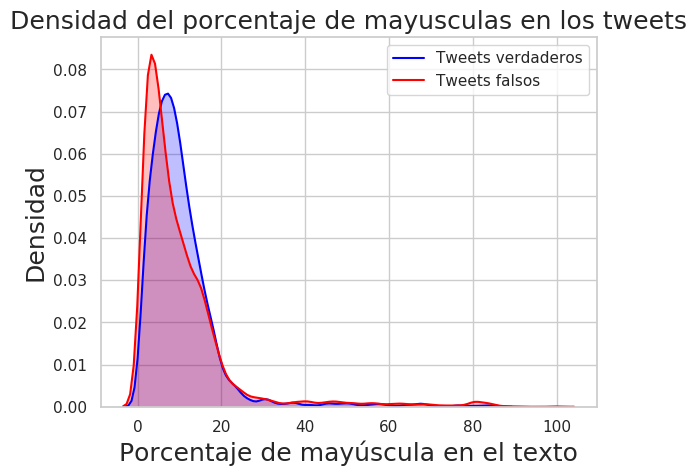

In [138]:
plot_tweets_mayus = sns.kdeplot(text_target_len_upper[text_target_len_upper['target'] == 1]["uppercase_percentage"],color="blue",label='Tweets verdaderos',
                 shade=True)
plot_tweets_mayus = sns.kdeplot(text_target_len_upper[text_target_len_upper['target'] == 0]["uppercase_percentage"],color="red",label='Tweets falsos',
                 shade=True)

plot_tweets_mayus.set_title("Densidad del porcentaje de mayusculas en los tweets", fontsize=18)
plot_tweets_mayus.set_xlabel("Porcentaje de mayúscula en el texto",fontsize=18)
plot_tweets_mayus.set_ylabel("Densidad", fontsize=18)

Se puede ver que para los tweets falsos, tenemos una densidad de los mismos con menor porcentaje de mayusculas que para los verdaderos. 

<h3>Caracteres numericos

Siguiendo la misma lógica del analisis de mayusuculas, podemos investigar la proporcion de caracteres numericos, agregando una nueva columna para esto.

In [139]:
def count_numeric(x):
    return sum(1 for c in str(x) if (c.isnumeric()))

text_target_len['numeric_percentage'] = ((text_target_len['text'].map(lambda x: count_numeric(x)) / \
                                           text_target_len['len']) * 100).round(2)
text_target_len

,text,target,len,uppercase_percentage,numeric_percentage
0,Our Deeds are the Reason of this #earthquake M...,1,69,14.49,0.00
1,Forest fire near La Ronge Sask. Canada,1,38,13.16,0.00
2,All residents asked to 'shelter in place' are ...,1,133,1.50,0.00
3,"13,000 people receive #wildfires evacuation or...",1,65,1.54,7.69
4,Just got sent this photo from Ruby #Alaska as ...,1,88,3.41,0.00
...,...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,83,8.43,1.20
7609,@aria_ahrary @TheTawniest The out of control w...,1,125,4.80,0.00
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,15.38,13.85
7611,Police investigating after an e-bike collided ...,1,137,2.92,0.00


Ahora, podemos agrupar por veracidad y ver el promedio del porcentaje y cantidad de caracteres numericos. Primero deberemos diferenciar entre los tweets que tengan números de los que no tienen ninguno

In [140]:
text_target_len_not_number = text_target_len[text_target_len["numeric_percentage"] == 0]
text_target_len_not_number

,text,target,len,uppercase_percentage,numeric_percentage
0,Our Deeds are the Reason of this #earthquake M...,1,69,14.49,0.0
1,Forest fire near La Ronge Sask. Canada,1,38,13.16,0.0
2,All residents asked to 'shelter in place' are ...,1,133,1.50,0.0
4,Just got sent this photo from Ruby #Alaska as ...,1,88,3.41,0.0
6,#flood #disaster Heavy rain causes flash flood...,1,95,4.21,0.0
...,...,...,...,...,...
7596,RT @LivingSafely: #NWS issues Severe #Thunders...,1,134,18.66,0.0
7602,a siren just went off and it wasn't the Forney...,1,65,1.54,0.0
7605,on the flip side I'm at Walmart and there is a...,1,114,2.63,0.0
7609,@aria_ahrary @TheTawniest The out of control w...,1,125,4.80,0.0


Luego, vamos a agruparlos por veracidad.

In [141]:
text_target_len_not_number_grouped = text_target_len_not_number.groupby(['target']).agg({"target":["count"]})
text_target_len_not_number_grouped.columns = text_target_len_not_number_grouped.columns.get_level_values(0) \
                                            + "-" + text_target_len_not_number_grouped.columns.get_level_values(1)
text_target_len_not_number_grouped

,target-count
target,
0,2187
1,901


In [142]:
(text_target_len_not_number_grouped.loc[0] / len(text_target_len_not_number) * 100).round(2)

target-count    70.82
Name: 0, dtype: float64

Y tenemos un porcentaje del 70% de falsedad de los tweets para aquellos que no tiene un numero

[Text(0, 0, 'Tweets falsos'), Text(0, 0, 'Tweets verdaderos')]

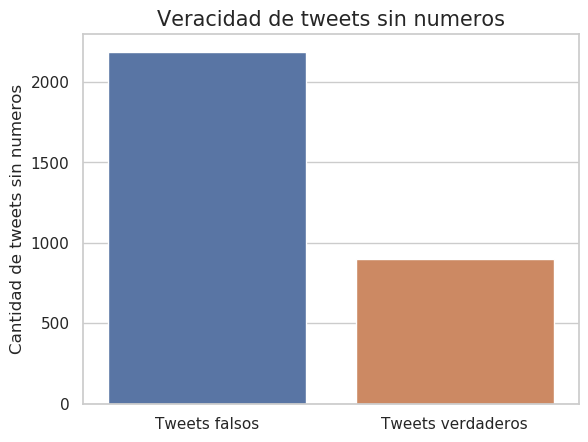

In [143]:
g = sns.barplot(y=text_target_len_not_number_grouped['target-count'], \
                x=text_target_len_not_number_grouped.index)
g.set_title("Veracidad de tweets sin numeros", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Cantidad de tweets sin numeros", fontsize=12)
g.set_xticklabels(labels=['Tweets falsos','Tweets verdaderos'])

Verificaremos lo mismo para aquellos que tienen al menos un número.

In [144]:
text_target_len_number = text_target_len[text_target_len["numeric_percentage"] > 0]

text_target_len_number_grouped = text_target_len_number.groupby(['target']).agg({"target":["count"]})
text_target_len_number_grouped.columns = text_target_len_number_grouped.columns.get_level_values(0) \
                                            + "-" + text_target_len_number_grouped.columns.get_level_values(1)
text_target_len_number_grouped

,target-count
target,
0,2155
1,2370


In [145]:
(text_target_len_number_grouped.loc[0] / len(text_target_len_number) * 100).round(2)

target-count    47.62
Name: 0, dtype: float64

Una vez mas, podemos ver que para aquellos tweets que al menos tengan un número, la diferencia no es muy grande.

[Text(0, 0, 'Tweets falsos'), Text(0, 0, 'Tweets verdaderos')]

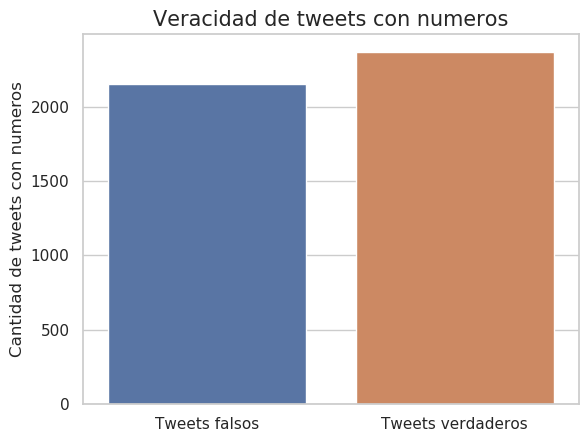

In [146]:
h = sns.barplot(y=text_target_len_number_grouped['target-count'], \
                x=text_target_len_number_grouped.index)
h.set_title("Veracidad de tweets con numeros", fontsize=15)
h.set_xlabel("", fontsize=12)
h.set_ylabel("Cantidad de tweets con numeros", fontsize=12)
h.set_xticklabels(labels=['Tweets falsos','Tweets verdaderos'])

Ahora, vamos a analizar el promedio de cantidad de numeros de los tweets para aquellos que al menos tengan un numero. Se agrupoara para saber el porcentaje y la cantidad de caracteres numericos para todos los tweets tanto falsos como verdaderos.

In [147]:
text_target_len_grouped_numeric = text_target_len_number.groupby(['target']).agg({"numeric_percentage":["mean","count"]})
text_target_len_grouped_numeric.columns = text_target_len_grouped_numeric.columns.get_level_values(0) \
                                        + "-" + text_target_len_grouped_numeric.columns.get_level_values(1)
text_target_len_grouped_numeric


,numeric_percentage-mean,numeric_percentage-count
target,,
0,3.140710,2155
1,3.356245,2370


Podemos ver que los promedios son practicamente similares.

Vamos a graficar la distribucion de ambos valores

Text(0, 0.5, 'Densidad')

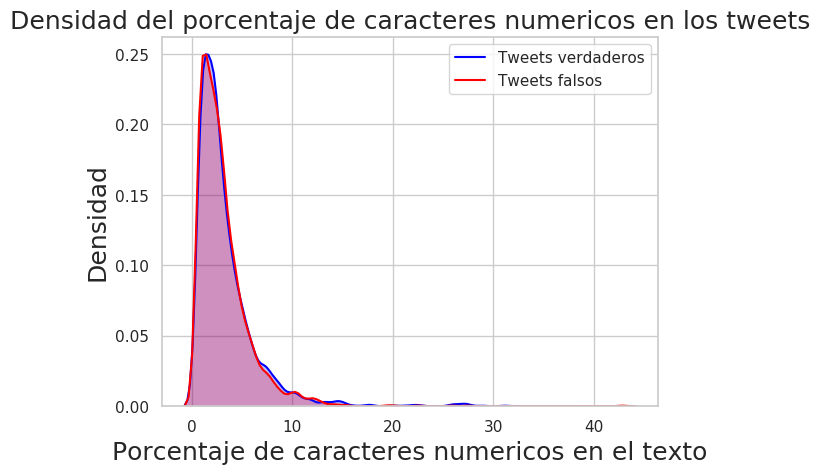

In [148]:
plot_tweets_numeric = sns.kdeplot(text_target_len_number[text_target_len_number['target'] == 1]["numeric_percentage"],color="blue",label='Tweets verdaderos',
                 shade=True)
plot_tweets_numeric = sns.kdeplot(text_target_len_number[text_target_len_number['target'] == 0]["numeric_percentage"],color="red",label='Tweets falsos',
                 shade=True)

plot_tweets_numeric.set_title("Densidad del porcentaje de caracteres numericos en los tweets", fontsize=18)
plot_tweets_numeric.set_xlabel("Porcentaje de caracteres numericos en el texto",fontsize=18)
plot_tweets_numeric.set_ylabel("Densidad", fontsize=18)
